# Fig 3C: Relative abundance plot

In [1]:
# import Python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import biom

In [2]:
# read in taxonomy table
tax = pd.read_csv("../reference/taxonomy_table.tsv", sep = '\t')

# expand taxon column into multiple columns for each specific taxonomic level
features = pd.DataFrame(tax['Feature ID'])
taxon_split = tax['Taxon'].str.split(';', expand=True).rename(columns={0: 'Kingdom', 1: 'Phylum', 2: 'Class', 3: 'Order', 4: 'Family', 5: 'Genus', 6: 'Species', 7: 'Strain'})
tax = pd.concat([features, taxon_split], axis=1)
tax = tax.set_index('Feature ID')
tax.index.name = None
tax.head()

,Kingdom,Phylum,Class,Order,Family,Genus,Species,Strain
G000005825,k__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Bacillaceae,g__Bacillus,s__Bacillus pseudofirmus,t__
G000006175,k__Archaea,p__Euryarchaeota,c__Methanococci,o__Methanococcales,f__Methanococcaceae,g__Methanococcus,s__Methanococcus voltae,t__
G000006605,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Corynebacteriales,f__Corynebacteriaceae,g__Corynebacterium,s__Corynebacterium jeikeium,t__
G000006725,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Xanthomonadales,f__Xanthomonadaceae,g__Xylella,s__Xylella fastidiosa,t__
G000006745,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Vibrionales,f__Vibrionaceae,g__Vibrio,s__Vibrio cholerae,t__


In [3]:
# read in biom table and merge with taxonomy table create above
data = biom.load_table("../data/table.filt.zebra10.overlap.biom")
data = data.to_dataframe()
linked_df = pd.concat([data, tax], axis=1).reindex(data.index)
linked_df.head()

,14365.Con.feces.13,14365.Con.feces.12,14365.Con.feces.10,14365.Con.feces.11,14365.Con.feces.14,14365.Con.feces.15,14365.Con.feces.1,14365.Con.feces.18,14365.Con.feces.17,14365.Con.feces.16,...,14365.Wound.feces.8,14365.Wound.feces.9,Kingdom,Phylum,Class,Order,Family,Genus,Species,Strain
G001314975,1818190.0,1940129.0,881363.0,1081167.0,3061899.0,2646084.0,496734.0,29547.0,1267499.0,5939775.0,...,579832.0,685333.0,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Bacteroides,s__Bacteroides thetaiotaomicron,t__
G000020225,77908.0,144431.0,13776.0,191570.0,33815.0,316749.0,2823.0,506.0,151513.0,231585.0,...,46472.0,3749.0,k__Bacteria,p__Verrucomicrobia,c__Verrucomicrobiae,o__Verrucomicrobiales,f__Akkermansiaceae,g__Akkermansia,s__Akkermansia muciniphila,t__
G000020205,5.0,0.0,2.0,159.0,13.0,1.0,0.0,0.0,15.0,2.0,...,2.0,9.0,k__Bacteria,p__Proteobacteria,c__Betaproteobacteria,o__Burkholderiales,f__Burkholderiaceae,g__Ralstonia,s__Ralstonia pickettii,t__
G000299455,0.0,2.0,168.0,2.0,2.0,1.0,0.0,3.0,2.0,3.0,...,1.0,3.0,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Escherichia,s__Escherichia coli,t__
G001953785,26284.0,4266.0,8.0,2300.0,35286.0,12020.0,1.0,1929.0,6402.0,13644.0,...,2.0,4.0,k__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,s__Lactobacillus murinus,t__


In [4]:
# subset biom data to each experimental group
ctrl = linked_df.filter(like='Con').reindex(linked_df.index)
wound = linked_df.filter(like='Wound').reindex(linked_df.index)
vanco = linked_df.filter(like='Vanco').reindex(linked_df.index)

# sum all values for each experimental group
ctrl['Control'] = pd.DataFrame(ctrl.sum(axis=1))
wound['Wound'] = pd.DataFrame(wound.sum(axis=1))
vanco['Vancomycin'] = pd.DataFrame(vanco.sum(axis=1))

In [5]:
# create aggregated total abundance table
agg_tot = pd.DataFrame(pd.concat([ctrl['Control'], wound['Wound'], vanco['Vancomycin']], axis = 1))
agg_tot.sum(axis=0) 
agg_tot = pd.DataFrame(pd.concat([linked_df['Species'], agg_tot], axis = 1))
agg_tot = agg_tot.set_index('Species')
agg_tot_rev = agg_tot[::-1][['Control', 'Vancomycin', 'Wound']]
agg_tot_rev.head()

,Control,Vancomycin,Wound
Species,,,
s__Thermoactinomyces sp. Gus2-1,102.0,1064.0,60.0
s__Bacillus clausii,386.0,2128.0,188.0
s__Lactobacillus acidophilus,425.0,1813.0,956.0
s__Pediococcus damnosus,476.0,2769.0,372.0
s__Staphylococcus lentus,77.0,5566.0,69.0


In [6]:
# create aggregated relative abundance table and add species column and set as index
agg_rel = pd.DataFrame(pd.concat([ctrl['Control']/ctrl['Control'].sum(), wound['Wound']/wound['Wound'].sum(), vanco['Vancomycin']/vanco['Vancomycin'].sum()], axis = 1)).round(5)
agg_rel.sum(axis=0) 
agg_rel = pd.DataFrame(pd.concat([linked_df['Species'], agg_rel], axis = 1))
agg_rel['Species'] = agg_rel['Species'].str.replace('s__', '')
agg_rel = agg_rel.set_index('Species')
agg_rel.head()

,Control,Wound,Vancomycin
Species,,,
Bacteroides thetaiotaomicron,0.78963,0.55195,0.08793
Akkermansia muciniphila,0.07330,0.12965,0.32600
Ralstonia pickettii,0.00001,0.00000,0.24288
Escherichia coli,0.00001,0.00002,0.14045
Lactobacillus murinus,0.00677,0.00731,0.09905


<Figure size 6000x14000 with 0 Axes>

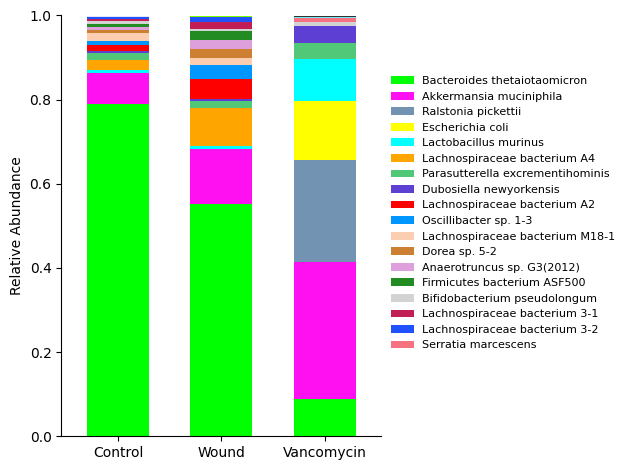

In [7]:
# create relative abundance plot by species
fig = plt.figure(figsize=(60, 140))

my_colors = ['#00ff00', '#FF10F0', '#7393B3', '#FFFF00', '#00FFFF', '#ffa500', '#50C878', '#5D3FD3', '#ff0000', '#0096FF', 
             '#FBCEB1', '#CD7F32', '#dda0dd', '#228B22', '#D3D3D3', '#C21E56', '#1F51FF', '#F67280', '#73ECFA', '#E6E6FA',
            '#303030', '#7CFC00', '#5C4033', '#4f0080', '#D3D3D3', '#DAF7A6', '#C0C0C0', '#7aef6e', '#f01104', '#a20032', 
             '#c40a6f', '#f1cd49', '#9ef0ce', '#8d685c']

data = agg_rel.transpose()
fig = agg_rel.transpose().plot.bar(stacked=True, color = my_colors, width = 0.6)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:18], labels[:18], bbox_to_anchor=(1.0, 0.88), prop={'size': 8}, fontsize=9, frameon=False) # display top 18 species in legend

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticklabels(['Control', 'Wound', 'Vancomycin'], rotation=360)
ax.set_ylabel("Relative Abundance")

plt.tight_layout()
plt.savefig("../plots/Fig_3C_relative_abundance.png", dpi = 600)
plt.show()
